In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.15.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [9]:
#importing the dataset
training_data=pd.read_csv('training_set_google.csv')

In [10]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-12,29.613998,29.638906,29.424212,29.556465,29.556465,69238554
1,2014-02-13,29.408520,29.885483,29.381371,29.885483,29.885483,73731331
2,2014-02-14,29.778631,29.997313,29.708645,29.957710,29.957710,87795852
3,2014-02-18,29.923092,30.208521,29.887974,30.158957,30.158957,84672187
4,2014-02-19,30.019978,30.117613,29.825706,29.946255,29.946255,84459392


In [11]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2462,2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400
2463,2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600
2464,2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400
2465,2023-11-28,137.630005,138.660004,137.039993,138.619995,138.619995,17046900
2466,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,20994400


In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2467 non-null   object 
 1   Open       2467 non-null   float64
 2   High       2467 non-null   float64
 3   Low        2467 non-null   float64
 4   Close      2467 non-null   float64
 5   Adj Close  2467 non-null   float64
 6   Volume     2467 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.0+ KB


In [15]:
training_set=training_data.iloc[:,1:2].values
#here we have selected the first column so indexed 1, and upper bound is excluded, so we made an array and we convereted it to
# numpy array by .values

In [18]:
training_set.shape, training_data.shape
# we have selected only 1 column

((2467, 1), (2467, 7))

In [20]:
# feature scaling , by normalisation as in RNN we do that
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1)) # instance of the class is created 
training_set_scaled=sc.fit_transform(training_set)

In [21]:
training_set_scaled

array([[0.03890932],
       [0.03729391],
       [0.04020361],
       ...,
       [0.88762867],
       [0.88810036],
       [0.89875295]])

In [29]:
# creating a DATA STRUCTURE with 60 timesteps and 1 output
# on 60 training data we train RNN and we get 1 output
x_train=[]
y_train=[]

#RNN network is going to predict an output from 60 stock prices, here it would learn and understand the relations

for i in range(60,2467):
    x_train.append(training_set_scaled[i-60:i,0]) # 0 is the column indexed
    y_train.append(training_set_scaled[i,0])
    
# these would be lists, now we would convert it into numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [30]:
x_train
# each observation has 60 values

array([[0.03890932, 0.03729391, 0.04020361, ..., 0.01198764, 0.00828708,
        0.00541365],
       [0.03729391, 0.04020361, 0.04133933, ..., 0.00828708, 0.00541365,
        0.00631135],
       [0.04020361, 0.04133933, 0.04210102, ..., 0.00541365, 0.00631135,
        0.01131339],
       ...,
       [0.88354055, 0.89438964, 0.8787449 , ..., 0.89053747, 0.89965709,
        0.90311614],
       [0.89438964, 0.8787449 , 0.88326536, ..., 0.89965709, 0.90311614,
        0.88762867],
       [0.8787449 , 0.88326536, 0.86427937, ..., 0.90311614, 0.88762867,
        0.88810036]])

In [32]:
y_train
# each observation has only 1 value

array([0.00631135, 0.01131339, 0.01420643, ..., 0.88762867, 0.88810036,
       0.89875295])

In [33]:
x_train.shape

(2407, 60)

In [34]:
y_train.shape

(2407,)

In [36]:
# with x_train and y_train our model will learn correlations
# reshaping the dataset, as RNN would take data in 3 dimenstions
x_train=x_train.reshape(2407,60,1) # 2407 is total observations, 60 is total number of columns, 1 is predictor

In [37]:
x_train.shape

(2407, 60, 1)

# Building LSTM

In [39]:
# defining an object (initializing RNN)
model=tf.keras.models.Sequential() #defining model of the class sequential

In [45]:
# first LSTM layers
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True, input_shape=(60,1))) #input shape is only done at the first layer
# return-sequences is true as its the first layer, if it would have been the last layer then we wouldn' t have done so
# dropout layer
model.add(tf.keras.layers.Dropout(0.2)) # a regularisation term

# second LSTM layers
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
# return-sequences is true as its the first layer, if it would have been the last layer then we wouldn' t have done so
# dropout layer
model.add(tf.keras.layers.Dropout(0.2)) # a regularisation term

# third LSTM layers
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
# return-sequences is true as its the first layer, if it would have been the last layer then we wouldn' t have done so
# dropout layer
model.add(tf.keras.layers.Dropout(0.2)) # a regularisation term

# fourth LSTM layers
model.add(tf.keras.layers.LSTM(units=120,activation='relu')) #return sequences is deleted, as after that we would be adding a dense layer
# return-sequences is true as its the first layer, if it would have been the last layer then we wouldn' t have done so
# dropout layer
model.add(tf.keras.layers.Dropout(0.2)) # a regularisation term

In [47]:
#output layer
model.add(tf.keras.layers.Dense(units=1)) #only 1 dimension would be there in output

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 lstm_2 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 60)            2

In [51]:
# now we have to compile the model and configure the process
model.compile(optimizer='adam', loss ='mean_squared_error') #default is rmsprop (in RNN is recommended)
# as its a regression problem hence we use MSE and not something like binary cross entropy

# Training the model

In [55]:
model.fit(x_train,y_train,batch_size=35, epochs=100) #epochs is 1 complete cycle, forward propagation for calculating 
#and backward propagation for updating the weights

Epoch 1/100
69/69 [==============================] - 20s 289ms/step - loss: 0.0012
Epoch 2/100
69/69 [==============================] - 20s 295ms/step - loss: 0.0012
Epoch 3/100
69/69 [==============================] - 21s 303ms/step - loss: 0.0012
Epoch 4/100
69/69 [==============================] - 20s 290ms/step - loss: 0.0012
Epoch 5/100
69/69 [==============================] - 20s 286ms/step - loss: 0.0012
Epoch 6/100
69/69 [==============================] - 20s 287ms/step - loss: 0.0011
Epoch 7/100
69/69 [==============================] - 20s 285ms/step - loss: 0.0011
Epoch 8/100
69/69 [==============================] - 21s 302ms/step - loss: 0.0011
Epoch 9/100
69/69 [==============================] - 21s 303ms/step - loss: 0.0012
Epoch 10/100
69/69 [==============================] - 20s 295ms/step - loss: 0.0012
Epoch 11/100
69/69 [==============================] - 20s 290ms/step - loss: 0.0012
Epoch 12/100
69/69 [==============================] - 19s 283ms/step - loss: 0.0012
E

# Making Predictions

In [56]:
test_data=pd.read_csv('testing_set_google.csv')

In [57]:
test_data.shape

(451, 7)

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       451 non-null    object 
 1   Open       451 non-null    float64
 2   High       451 non-null    float64
 3   Low        451 non-null    float64
 4   Close      451 non-null    float64
 5   Adj Close  451 non-null    float64
 6   Volume     451 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.8+ KB


In [59]:
real_stock_price=test_data.iloc[:,1:2].values

In [61]:
real_stock_price.shape

(451, 1)

In [87]:
# getting predicted stock prices

# concatination
dataset_total=pd.concat((training_data['Open'], test_data['Open']), axis=0) #on the basis of Row, so we did axis=0
# while predicting we use training data and not the scaled one after transformation

# stock prices of previous 60 days for each day

inputs= dataset_total[len(dataset_total)-len(test_data)-60: ].values #prev 60 days

# reshaping (convert into numpy array)
inputs = inputs.reshape(-1,1)

# now feature scalling
inputs = sc.transform(inputs)

x_test=[] 
# this empty list would be apended

# creating a test set
for i in range (60,511):
    x_test.append(inputs[i-60:i, 0])

#convert into numpy array
x_test=np.array(x_test)

#now convert it into 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1)) # 1 is the extra dimension we are adding

# getting predicted stock prices
predicted_stock_prices=model.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_prices) # as we had applied transformation, so we did reverse transformation
    

15/15 [==============================] - 2s 124ms/step


In [88]:
print(predicted_stock_price), print(real_stock_price[0])

[[131.36566 ]
 [130.71103 ]
 [130.05522 ]
 [129.71284 ]
 [129.59105 ]
 [129.1296  ]
 [128.06923 ]
 [126.935844]
 [125.451324]
 [124.39344 ]
 [124.69858 ]
 [125.7914  ]
 [126.892395]
 [128.00461 ]
 [128.87155 ]
 [129.49533 ]
 [129.41614 ]
 [129.0288  ]
 [128.68742 ]
 [129.20201 ]
 [129.57431 ]
 [129.01048 ]
 [128.41264 ]
 [128.56728 ]
 [129.4469  ]
 [130.71803 ]
 [131.8871  ]
 [133.0948  ]
 [134.2824  ]
 [135.47871 ]
 [136.33563 ]
 [136.91553 ]
 [137.2259  ]
 [137.16637 ]
 [136.51012 ]
 [135.46773 ]
 [134.67078 ]
 [134.10359 ]
 [132.92245 ]
 [131.37093 ]
 [129.65007 ]
 [127.92226 ]
 [126.05787 ]
 [124.1746  ]
 [122.35706 ]
 [120.83246 ]
 [120.18794 ]
 [119.92149 ]
 [119.09346 ]
 [117.36693 ]
 [115.46564 ]
 [113.5407  ]
 [111.64482 ]
 [109.750404]
 [107.86004 ]
 [106.429436]
 [105.921844]
 [106.313736]
 [106.70063 ]
 [106.41639 ]
 [105.81145 ]
 [105.17643 ]
 [104.578804]
 [104.22336 ]
 [104.30007 ]
 [104.884674]
 [105.592545]
 [105.71908 ]
 [105.31122 ]
 [104.703995]
 [103.892784]
 [102.

(None, None)

# Visualisation

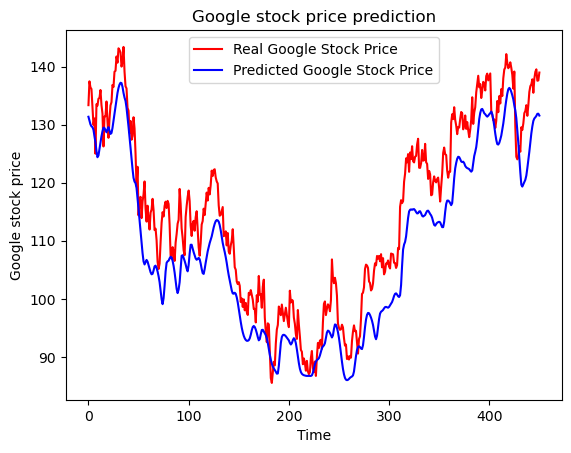

In [89]:
# visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()

As we can see the trend is captured, the trend would be more captured if we go on adding more layers.